# Earthquake Animation and Analysis with Python

This notebook presents a visual analysis of earthquakes in Central America for the last 50 years (1975-2025, July).

We will:

- Load and clean historical earthquake data.
- Perform basic statistical analysis of data.
- Create graphs to visualize earthquakes for each country and region.
- Create interactive maps for visual analysis.


> ⚠️ **Disclaimer**  
> I am not a seismologist or earthquake expert. This analysis was created for informational and visualization purposes only, based on publicly available earthquake data.  
> It should not be used for emergency planning, risk assessment, or scientific conclusions.


## Importing Libraries, cleaning and basic analysis

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Geospatial and mapping
#import geopandas as gpd
#from shapely.geometry import Point
#import geodatasets 

# Animation
import folium
from folium.plugins import HeatMap

# Date handling
from datetime import datetime

# Display settings
sns.set_theme(style='whitegrid')
sns.set_palette('Reds')

import warnings
warnings.filterwarnings('ignore') 



### Load and Preview the Dataset

The earthquake data used in this analysis was obtained from the [United States Geological Survey (USGS) Earthquake Hazards Program](https://www.usgs.gov/programs/earthquake-hazards). This program provides comprehensive, publicly accessible data on global seismic activity, including information on earthquake location, magnitude, depth, and time of occurrence. The dataset is a valuable resource for monitoring and analyzing seismic events worldwide.

We now load the earthquake dataset located in the specified folder.  
Once loaded, we perform a basic inspection of the DataFrame to understand its structure, columns, and the first few records.


In [2]:
# File path (adjust if needed)
filePath = 'data/earthquakes_ca.csv'

# Load the dataset
df = pd.read_csv(filePath, parse_dates=['time'])

# Show basic info
print("✅ Dataset loaded successfully.\n")
print("🧾 Columns and Data Types:")
print(df.dtypes)

# Show shape
print(f"\n🔢 Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

# Show first 5 rows
df.head()


✅ Dataset loaded successfully.

🧾 Columns and Data Types:
time               datetime64[ns, UTC]
latitude                       float64
longitude                      float64
depth                          float64
mag                            float64
magType                         object
nst                            float64
gap                            float64
dmin                           float64
rms                            float64
net                             object
id                              object
updated                         object
place                           object
type                            object
horizontalError                float64
depthError                     float64
magError                       float64
magNst                         float64
status                          object
locationSource                  object
magSource                       object
dtype: object

🔢 Number of rows: 17140, Number of columns: 22


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-07-10 14:38:30.411000+00:00,14.1579,-90.2115,161.377,5.0,mb,49.0,124.0,0.464,0.97,...,2025-07-10T14:53:22.792Z,"7 km ESE of Santa María Ixhuatán, Guatemala",earthquake,7.40,7.054,0.027,441.0,reviewed,us,us
1,2025-07-10 13:19:21.318000+00:00,15.7301,-93.6942,10.000,5.1,mb,17.0,172.0,1.595,0.87,...,2025-07-10T14:07:57.289Z,"14 km SW of Manuel Ávila Camacho (Ponte Duro),...",earthquake,7.11,1.984,0.024,571.0,reviewed,us,us
2,2025-07-10 08:29:34.201000+00:00,14.5141,-90.6998,2.730,4.0,mb,16.0,149.0,0.196,0.61,...,2025-07-10T14:54:29.325Z,"2 km NNE of Santa María de Jesús, Guatemala",earthquake,4.27,7.192,0.212,6.0,reviewed,us,us
3,2025-07-10 04:26:44.855000+00:00,14.4684,-90.6569,10.000,3.5,ml,8.0,152.0,0.166,0.88,...,2025-07-10T13:50:44.079Z,"2 km WSW of Amatitlán, Guatemala",earthquake,2.81,1.791,0.081,20.0,reviewed,us,us
4,2025-07-09 06:32:47.191000+00:00,14.4667,-90.6800,10.000,3.4,ml,9.0,153.0,0.188,0.37,...,2025-07-09T14:24:52.996Z,"4 km SE of Santa María de Jesús, Guatemala",earthquake,2.71,1.953,0.081,20.0,reviewed,us,us


### Extract Country from Place and Filter Central America

Each earthquake record includes a descriptive `place` field, which usually ends with the name of the country.  
To focus on earthquakes in Central America, we create a new column called `country` by extracting the country name from the `place` field.

Then, we define a list of Central American countries and use it to filter the dataset.

**Central America countries included in the analysis:**
- Guatemala
- El Salvador
- Honduras
- Nicaragua
- Costa Rica
- Panama


In [3]:
# Create the 'country' column by extracting the last word in the 'place' field
df['country'] = df['place'].apply(lambda x: str(x).split(',')[-1].strip())

# Define list of Central American countries
countrysList = ['Guatemala', 'El Salvador', 'Honduras', 'Nicaragua', 'Costa Rica', 'Panama']

# Filter the DataFrame to only include those countries
df = df[df['country'].isin(countrysList)].copy()

# Show unique countries found
print("✅ Unique countries in filtered dataset:")
print(df['country'].unique())

# Show the number of rows after filtering
print(f"\n📉 Rows after filtering: {df.shape[0]}")

# Preview the filtered data
df[['time', 'latitude', 'longitude', 'mag', 'depth', 'country', 'place']].head()


✅ Unique countries in filtered dataset:
['Guatemala' 'Costa Rica' 'Nicaragua' 'El Salvador' 'Panama' 'Honduras']

📉 Rows after filtering: 12202


,time,latitude,longitude,mag,depth,country,place
0,2025-07-10 14:38:30.411000+00:00,14.1579,-90.2115,5.0,161.377,Guatemala,"7 km ESE of Santa María Ixhuatán, Guatemala"
2,2025-07-10 08:29:34.201000+00:00,14.5141,-90.6998,4.0,2.730,Guatemala,"2 km NNE of Santa María de Jesús, Guatemala"
3,2025-07-10 04:26:44.855000+00:00,14.4684,-90.6569,3.5,10.000,Guatemala,"2 km WSW of Amatitlán, Guatemala"
4,2025-07-09 06:32:47.191000+00:00,14.4667,-90.6800,3.4,10.000,Guatemala,"4 km SE of Santa María de Jesús, Guatemala"
5,2025-07-09 06:13:17.040000+00:00,14.4121,-90.6944,3.8,10.000,Guatemala,"0 km NNE of Palín, Guatemala"


### Data Quality Check

Before performing any analysis or visualization, we reviewed the quality of the dataset by inspecting several key aspects:

#### 🔍 Missing Values
We checked for missing or null values in all columns to identify incomplete data.

#### 🔤 Categorical Variables
We explored the unique values present in categorical fields such as:
- `type` – Type of seismic event (e.g., earthquake, explosion).
- `magType` – Type of magnitude measurement (e.g., mb, ml, mww).
- `status` – Review status of the event (e.g., reviewed, automatic).

#### 📊 Magnitude and Depth
We analyzed basic statistics for:
- `mag` (magnitude): to detect extremely low or high values.
- `depth` (km): to identify any negative or suspicious values.

We also checked for:
- Earthquakes with magnitude ≤ 0 (which may be errors or sensor noise).
- Earthquakes with negative depth (likely data entry errors).

#### 🕒 Date Consistency
We validated the `time` column by:
- Converting it to datetime format.
- Identifying missing or invalid dates.
- Displaying the full date range in the dataset.
- Showing the number of earthquake records per year to understand temporal coverage and any anomalies.

This quality check ensures the dataset is ready for analysis and visualization.


In [4]:
# 1. Check for missing values
print("🔍 Missing values per column:\n")
print(df.isnull().sum())

# 2. Unique values in categorical columns
print("\n🔤 Unique values in 'type':", df['type'].unique())
print("🔤 Unique values in 'magType':", df['magType'].unique())
print("🔤 Unique values in 'status':", df['status'].unique())

# 3. Magnitude and depth statistics
print("\n📊 Magnitude stats:")
print(df['mag'].describe())

print("\n📏 Depth stats (km):")
print(df['depth'].describe())

# 4. Check for invalid magnitude or depth
print("\n❗ Records with zero or negative magnitude:")
print(df[df['mag'] <= 0])

print("\n❗ Records with negative depth:")
print(df[df['depth'] < 0])

# 5. Date range and year distribution
print("\n🕒 Checking 'time' column:")

# Ensure 'time' is datetime
df['time'] = pd.to_datetime(df['time'], errors='coerce')  # coerce to NaT if invalid

# Missing or invalid time values
missingDates = df['time'].isnull().sum()
print(f"🗓️ Missing or invalid dates: {missingDates}")

# Date range
print("📅 Date range:", df['time'].min(), "→", df['time'].max())

# Distribution by year
df['year'] = df['time'].dt.year
print("\n📈 Number of records per year:")
print(df['year'].value_counts().sort_index())


🔍 Missing values per column:

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                7132
gap                5244
dmin               8380
rms                1467
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    8716
depthError         5615
magError           8402
magNst             2747
status                0
locationSource        0
magSource             0
country               0
dtype: int64

🔤 Unique values in 'type': ['earthquake']
🔤 Unique values in 'magType': ['mb' 'ml' 'mww' 'mwr' 'mb_lg' 'md' 'mwb' 'mwc' 'ms' 'mw' 'm']
🔤 Unique values in 'status': ['reviewed' 'automatic']

📊 Magnitude stats:
count    12202.000000
mean         4.440838
std          0.505557
min          2.500000
25%          4.200000
50%          4.400000
75%          4.600000
max          7.700000
Name: mag, dtype: f

### Understanding the `magType` Field

The `magType` column indicates the method used to calculate the magnitude of each earthquake. Different methods are suited for different distances, depths, and types of seismic waves. Common values include:

- **ml** – Local magnitude (Richter scale), common for small, nearby earthquakes.
- **mb** – Body-wave magnitude, often used for deeper or distant earthquakes.
- **mww** – Moment magnitude, a modern and more reliable scale for large events.
- **mb_lg** – Regional body-wave magnitude, used for continental crust events.

Although these scales are not directly interchangeable, for visualization purposes (such as animations), it is acceptable to use the general `mag` value unless precision is critical.

We will now analyze the distribution of `magType` in our filtered dataset to assess whether it's consistent enough to use `mag` as-is in our animation.


🔢 Earthquake count by magType:

magType
mb       9615
md       1175
mwc       400
mww       303
mwr       191
mw        180
ml        116
ms         83
mwb        76
m          62
mb_lg       1
Name: count, dtype: int64


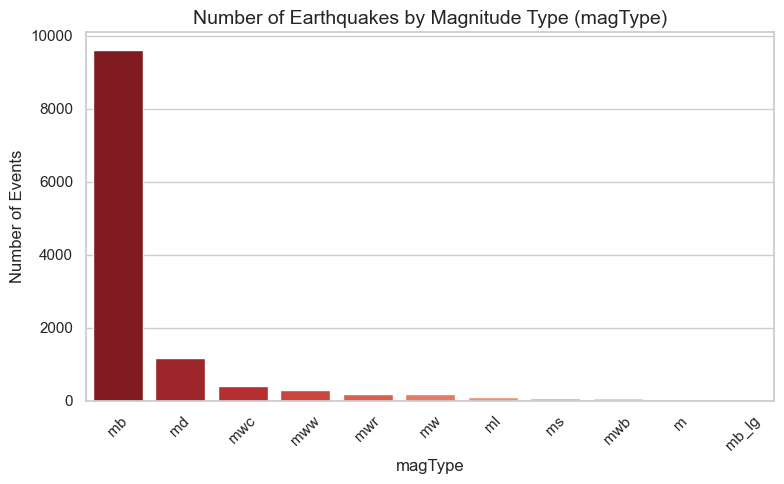

In [5]:
# Count number of records by magnitude type
magTypeCounts = df['magType'].value_counts().sort_values(ascending=False)

# Display counts
print("🔢 Earthquake count by magType:\n")
print(magTypeCounts)

# Plot as bar chart
plt.figure(figsize=(8, 5))
#sns.barplot(x=magTypeCounts.index, y=magTypeCounts.values, palette='Reds_r')
sns.barplot(x=magTypeCounts.index, y=magTypeCounts.values, hue=magTypeCounts.index, legend=False, palette='Reds_r')
plt.title('Number of Earthquakes by Magnitude Type (magType)', fontsize=14)
plt.xlabel('magType')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### As shown in the graph above, the `mb` magType is predominant in the dataset, so the influence of the other types can be considered negligible for illustration purposes.


### Create a Simplified DataFrame

To improve performance and focus the analysis on key variables, we create a new DataFrame containing only the most relevant columns:

- `time`: Date and time of the earthquake  
- `latitude`: Geographic latitude  
- `longitude`: Geographic longitude  
- `depth`: Depth of the event (in kilometers)  
- `mag`: Magnitude of the earthquake  
- `country`: Country where the earthquake occurred  

This will reduce memory usage and simplify processing in the next steps, while allowing us to perform geographic analysis at the country level.


In [6]:
# Select only essential columns into a simplified DataFrame
eqSimple = df[['time', 'latitude', 'longitude', 'depth', 'mag', 'country']].copy()

# Show shape and preview
print(f"✅ Simplified DataFrame 'eqSimple' created with {eqSimple.shape[0]} rows and {eqSimple.shape[1]} columns.\n")
eqSimple.head()

# Export to CSV
eqSimple.to_csv('eqSimple.csv', index=False)
print("📁 File 'eqSimple.csv' exported successfully.")



✅ Simplified DataFrame 'eqSimple' created with 12202 rows and 6 columns.

📁 File 'eqSimple.csv' exported successfully.


## Statistical Analysis by Year

We begin our statistical analysis by grouping earthquake records by year.  
For each year, we compute:

- Total number of earthquakes
- Average magnitude
- Maximum and minimum magnitudes
- Average depth

This helps us identify trends in seismic activity over time.


📊 Earthquake statistics by year:


,year,eventCount,avgMag,maxMag,minMag,avgDepth
0,1975,38,4.660526,5.8,3.4,55.394737
1,1976,172,4.791860,7.5,3.6,45.860465
2,1977,74,4.716216,5.9,3.7,73.094595
3,1978,105,4.814286,7.0,3.5,64.476190
4,1979,126,4.776984,6.8,4.0,61.134921


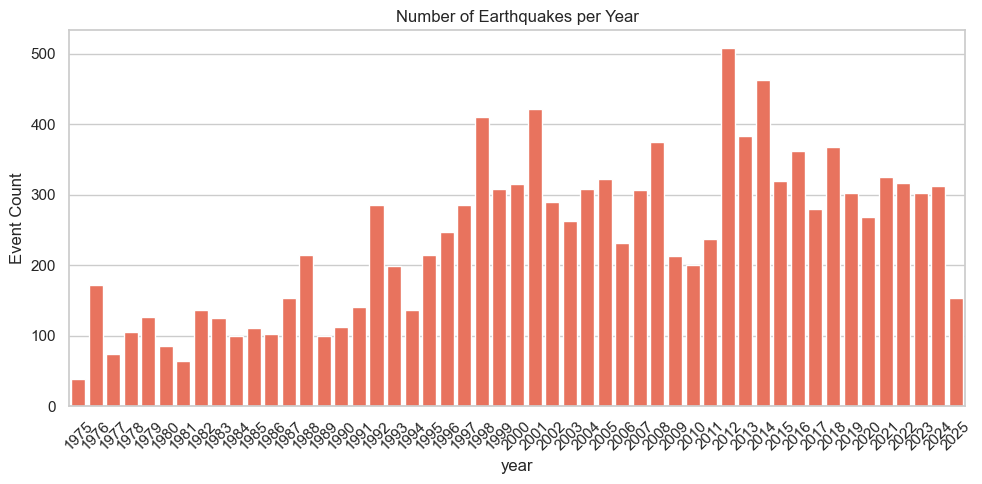

In [7]:
# Extract year from the time column
eqSimple['year'] = eqSimple['time'].dt.year

# Group by year and compute statistics
statsByYear = eqSimple.groupby('year').agg(
    eventCount=('mag', 'count'),
    avgMag=('mag', 'mean'),
    maxMag=('mag', 'max'),
    minMag=('mag', 'min'),
    avgDepth=('depth', 'mean')
).reset_index()

# Show the resulting DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

print("📊 Earthquake statistics by year:")
display(statsByYear.head())

# Optional: Plot number of earthquakes per year
plt.figure(figsize=(10, 5))
sns.barplot(data=statsByYear, x='year', y='eventCount', color='tomato')
plt.title('Number of Earthquakes per Year')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Earthquake Frequency vs. Average Magnitude

To explore the relationship between the number of earthquakes and their average magnitude,  
we created a scatterplot where:

- The X-axis shows the **number of earthquakes per year**
- The Y-axis shows the **average magnitude**
- The color of each point represents the **year**

### Key Observations:
- Earlier years (in blue) tend to have fewer events but higher average magnitudes.
- More recent years (in red tones) show an increase in the number of recorded earthquakes, with a **decline in average magnitude**.
- This trend might be influenced by improved seismic detection systems, which record more low-magnitude events.

This visualization suggests an **inverse relationship** between frequency and average magnitude, highlighting the importance of data quality and technological context in long-term seismic analysis.


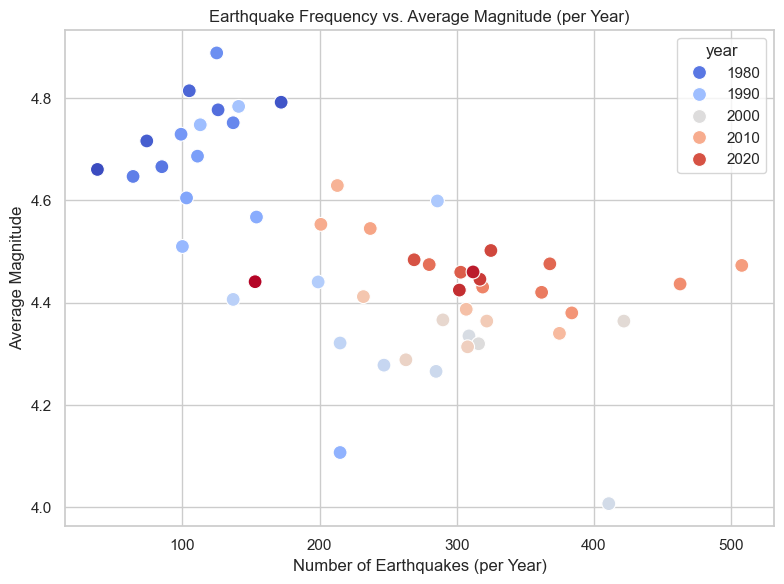

In [8]:
# Scatter plot: event count vs average magnitude
plt.figure(figsize=(8, 6))
sns.scatterplot(data=statsByYear, x='eventCount', y='avgMag', hue='year', palette='coolwarm', s=100)

plt.title('Earthquake Frequency vs. Average Magnitude (per Year)')
plt.xlabel('Number of Earthquakes (per Year)')
plt.ylabel('Average Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()



### Hypothesis: Historical Bias in Earthquake Records

The scatterplot and bar chart suggest that in recent decades there are **more recorded earthquakes**, but their **average magnitude is lower**.

This leads to the following hypothesis:

> **In earlier decades, only stronger earthquakes were recorded due to limited seismic detection technology.**

### How we will test this:
1. **Check the minimum magnitude per decade**:  
   If the hypothesis is true, we should not see low-magnitude events (e.g., < 3.0) in earlier decades.

2. **Plot the magnitude distribution by decade**:  
   This will help visualize how the range and central tendency of magnitudes changed over time.

3. **Count the number of earthquakes with magnitude < 3.0 per decade**:  
   If this count is near zero for the 1980s and 1990s but increases later, it would support the hypothesis.


🔍 Minimum magnitude recorded per decade:
   decade  mag
0    1970  3.4
1    1980  2.5
2    1990  2.5
3    2000  3.2
4    2010  2.5
5    2020  2.9


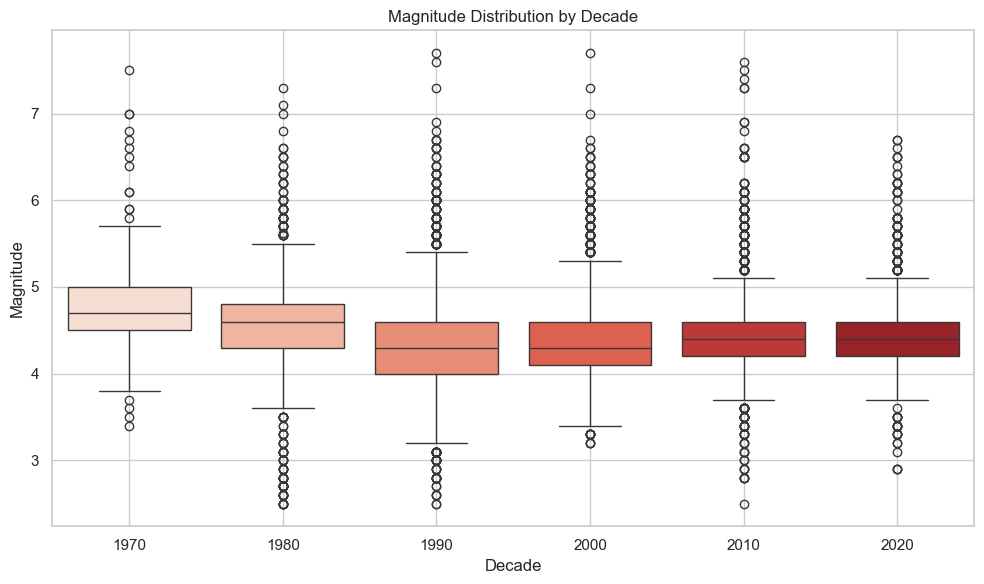

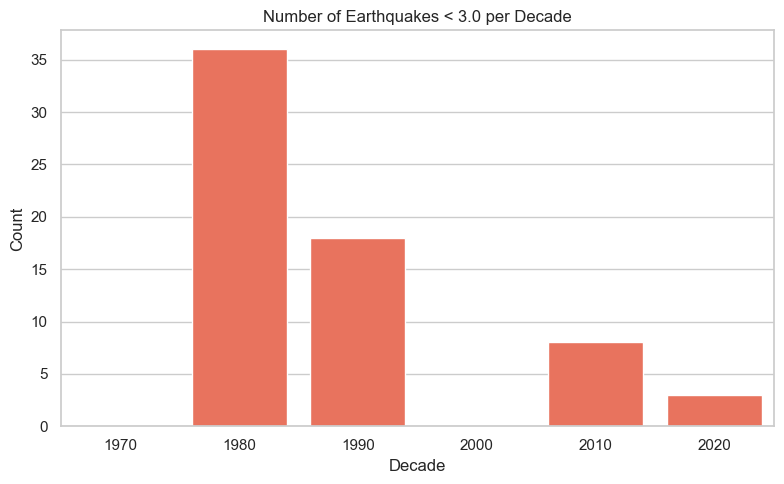

In [9]:
# Add 'decade' column
eqSimple['decade'] = (eqSimple['year'] // 10) * 10

# 1. Minimum magnitude per decade
minMagByDecade = eqSimple.groupby('decade')['mag'].min().reset_index()
print("🔍 Minimum magnitude recorded per decade:")
print(minMagByDecade)

# 2. Boxplot of magnitude distribution by decade
plt.figure(figsize=(10, 6))
sns.boxplot(data=eqSimple, x='decade', y='mag', palette='Reds')
plt.title('Magnitude Distribution by Decade')
plt.ylabel('Magnitude')
plt.xlabel('Decade')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Count of earthquakes with magnitude < 3.0 per decade
eqSimple['isSmall'] = eqSimple['mag'] < 3.0
smallCount = eqSimple.groupby('decade')['isSmall'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=smallCount, x='decade', y='isSmall', color='tomato')
plt.title('Number of Earthquakes < 3.0 per Decade')
plt.ylabel('Count')
plt.xlabel('Decade')
plt.tight_layout()
plt.show()


### Hypothesis Review: Relationship Between Time and Earthquake Magnitude

Initially, we assumed that recent decades had more earthquakes due to better detection systems, especially for low-magnitude events. However, the data reveals a different pattern:

- The **1980s** show the **highest number of earthquakes with magnitude < 3.0**, followed by the **1990s**.
- From **2000 onward**, the count of these low-magnitude events **decreases significantly**, and in the **1970s**, there were **none recorded**.

✔️ The **boxplot confirms** that strong earthquakes (high magnitudes) are present across all decades, including recent ones.

❗ However, the **high number of low-magnitude events in the 1980s and 1990s** challenges the assumption that small earthquakes were under-recorded in the past. In fact, it suggests that **detection of small quakes was already possible** in earlier decades — perhaps even better recorded at certain times than in the 2000s or 2010s.

🔍 **Revised Conclusion:** The idea that small earthquakes were only recorded in recent decades is **not supported** by the data. The **1980s had the most sub-3.0 events**, not the most recent decades. This indicates that **variations in recording practices, dataset coverage, or source quality** may influence our interpretation more than technology alone.

**Next step:** To remove this potential bias, we can focus future analyses on earthquakes **≥ 4.0**, which are more consistently recorded across all decades.


### Filtering Earthquakes by Magnitude ≥ 4.0

To better understand whether the apparent trend of more frequent but lower-magnitude earthquakes in recent decades is influenced by improvements in detection, we will filter the dataset to only include earthquakes with a magnitude greater than or equal to 4.0. This threshold excludes minor seismic events that may not have been recorded reliably in earlier decades. 

After filtering, we will recreate the scatter plot of earthquake frequency versus average magnitude per year to assess if the pattern remains consistent.


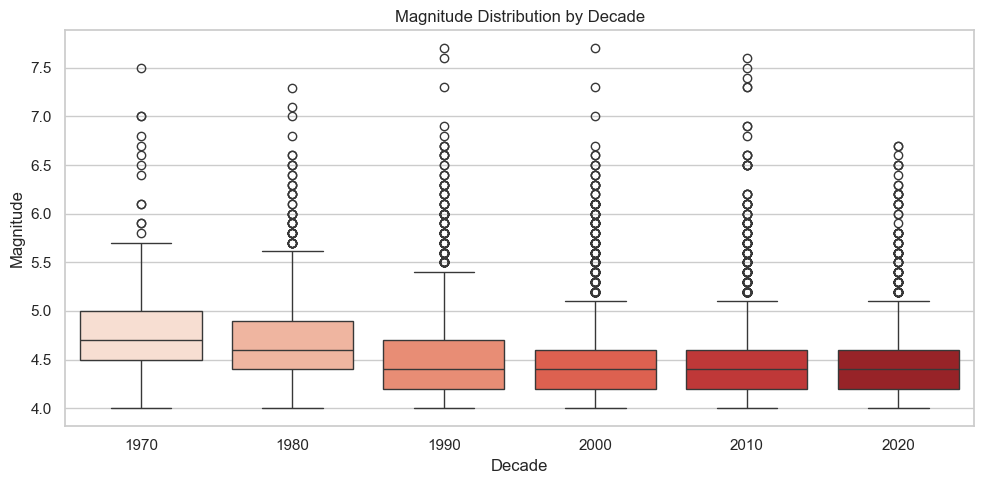

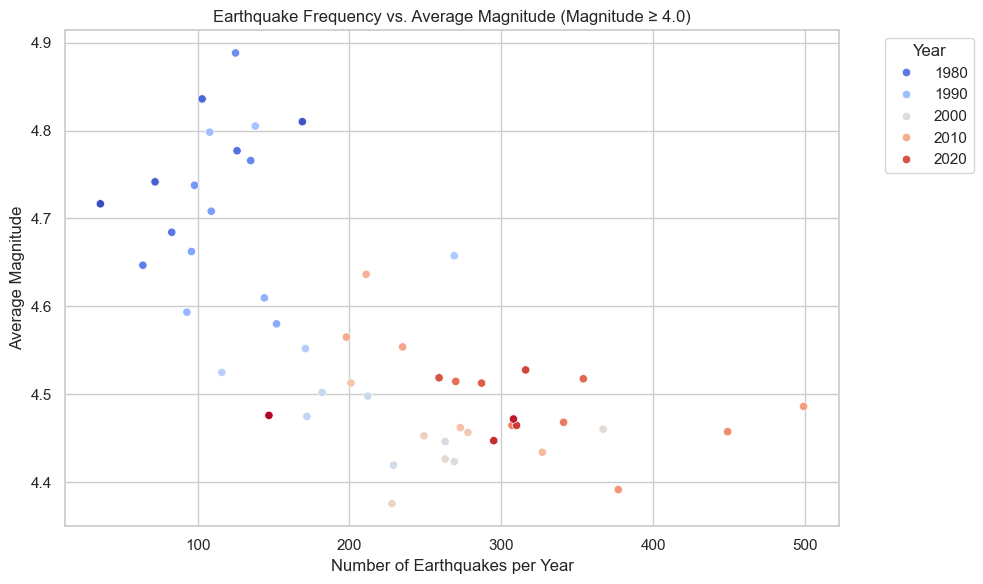

In [10]:
# Set threshold
minMagnitude = 4.0

# Filter dataset
eqFiltered = eqSimple[eqSimple['mag'] >= minMagnitude].copy()  
eqFiltered.loc[:, 'decade'] = (eqFiltered['year'] // 10) * 10  

# Boxplot (Top)
plt.figure(figsize=(10, 5))
sns.boxplot(data=eqFiltered, x='decade', y='mag', palette='Reds')  
plt.title("Magnitude Distribution by Decade")
plt.xlabel("Decade")
plt.ylabel("Magnitude")
plt.tight_layout()
plt.show()

# Group by year and calculate stats for scatter
yearStats = eqFiltered.groupby('year').agg(
    avgMag=('mag', 'mean'),
    count=('mag', 'count')
).reset_index()

# Scatter plot (Bottom)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=yearStats, x='count', y='avgMag', hue='year', palette='coolwarm', legend='brief')
plt.title(f"Earthquake Frequency vs. Average Magnitude (Magnitude ≥ {minMagnitude})")
plt.xlabel("Number of Earthquakes per Year")
plt.ylabel("Average Magnitude")
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Scatter Plot: Earthquake Frequency vs. Average Magnitude (Magnitude ≥ 4.0)

By filtering out earthquakes with a magnitude less than 4.0, we reduce the bias introduced by increased sensitivity of seismic detection in recent years. This allows for a more consistent comparison across decades.

The scatter plot below shows the relationship between the number of earthquakes per year and their average magnitude, only considering earthquakes with magnitude ≥ 4.0.

#### Observations:
- Earlier decades (e.g., 1980s, 1990s) show fewer events but higher average magnitudes.
- Recent decades (e.g., 2010s, 2020s) show an increase in frequency, with a decrease in average magnitude.
- This suggests that, even when accounting for magnitude, recent decades are still characterized by more frequent, smaller-magnitude events.


## Strong Earthquakes Analysis (Magnitude ≥ 6.0)

This section focuses on the strongest earthquakes (magnitude 6.0 and above), which are the ones most likely to impact populations and infrastructure.

1. The **bar chart** shows the number of strong earthquakes per decade.
2. The **boxplot** displays the distribution of magnitudes across decades.
3. The **scatter plot** compares the frequency and average magnitude of these strong earthquakes per year.

These visualizations help to evaluate whether the frequency or strength of major earthquakes has changed over time.



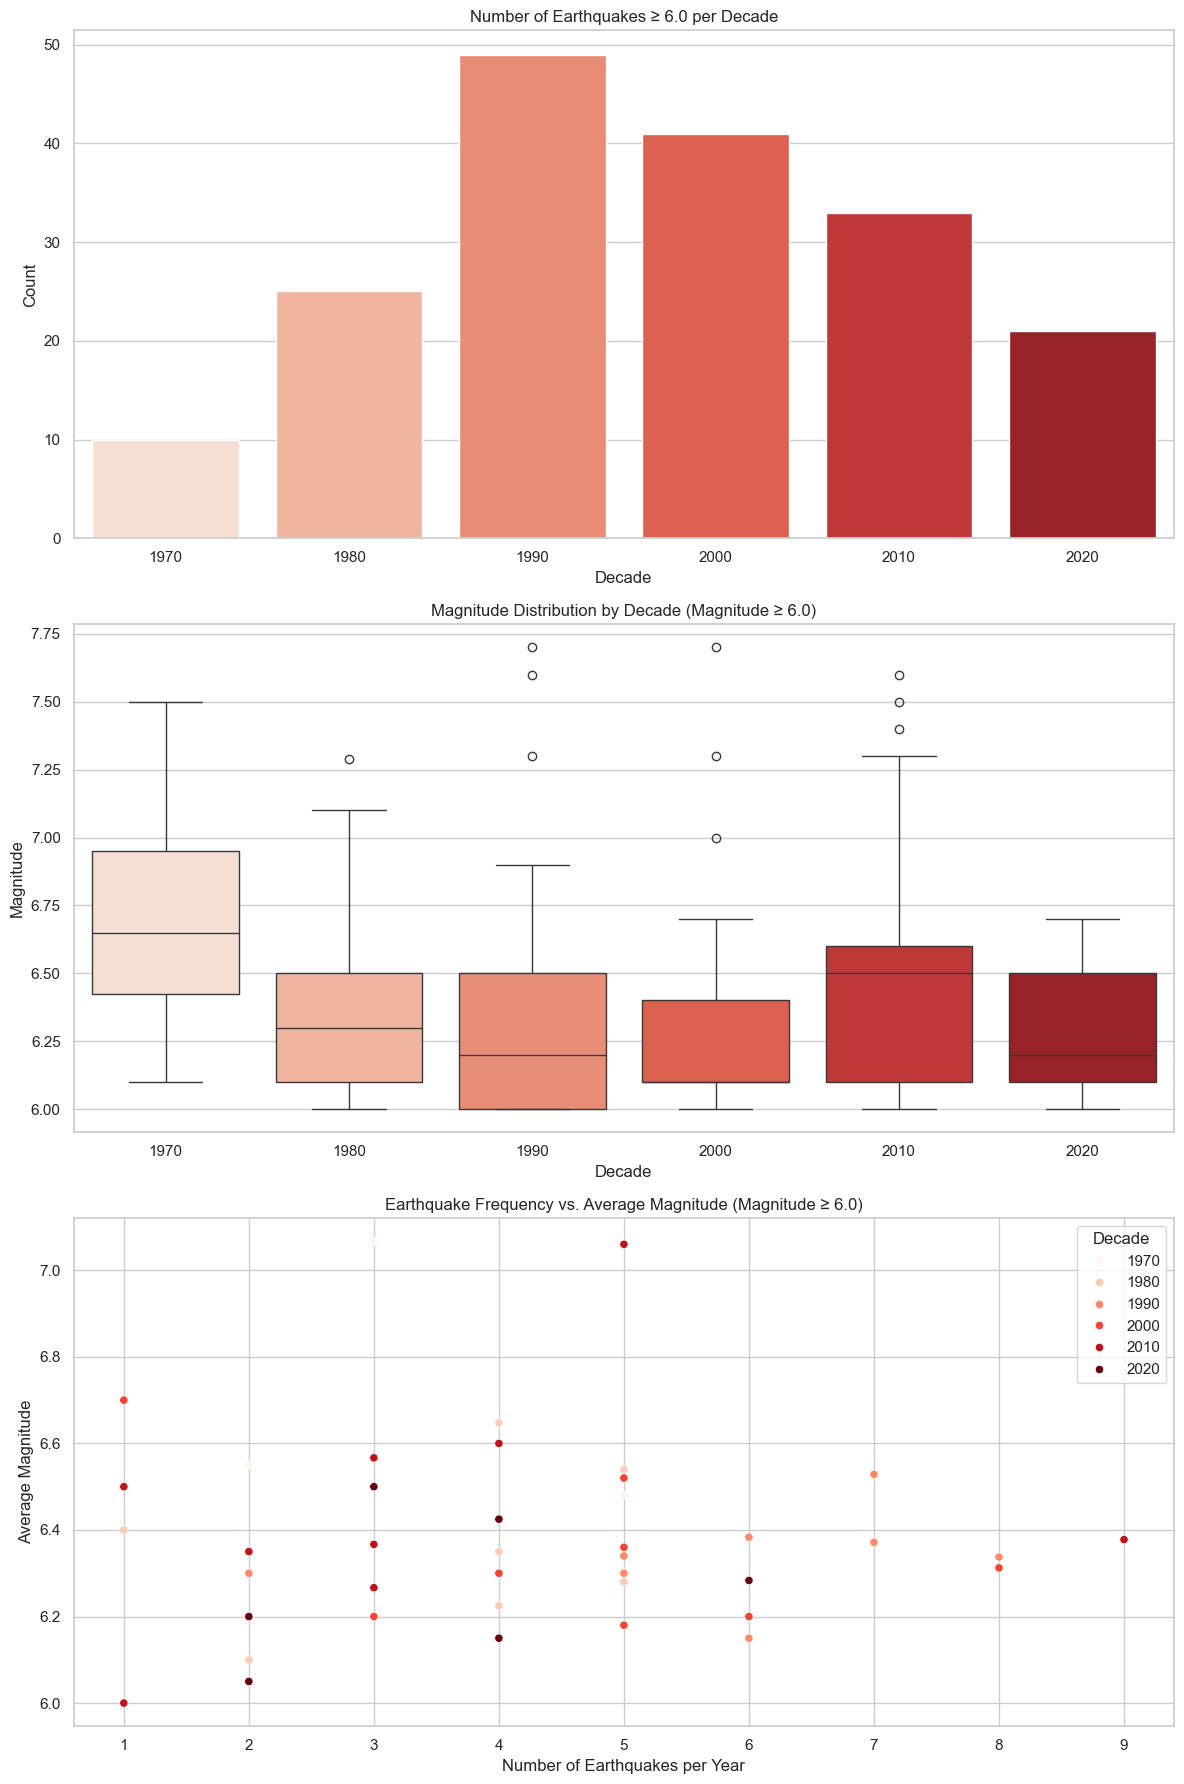

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter for strong earthquakes (≥ 6.0)
eqStrong = eqFiltered[eqFiltered['mag'] >= 6.0].copy()
eqStrong['decade'] = (eqStrong['year'] // 10) * 10

# Prepare yearly stats
yearlyStatsStrong = eqStrong.groupby('year').agg(
    earthquakeCount=('mag', 'count'),
    avgMagnitude=('mag', 'mean')
).reset_index()
yearlyStatsStrong['decade'] = (yearlyStatsStrong['year'] // 10) * 10

# Count earthquakes per decade
decadeCounts = eqStrong.groupby('decade')['mag'].count().reset_index()
decadeCounts.columns = ['Decade', 'Earthquake Count']

# Plotting
plt.figure(figsize=(12, 18))

# 1. Barplot - Earthquake count per decade
plt.subplot(3, 1, 1)
sns.barplot(data=decadeCounts, x='Decade', y='Earthquake Count', palette='Reds')
plt.title('Number of Earthquakes ≥ 6.0 per Decade')
plt.ylabel('Count')
plt.xlabel('Decade')

# 2. Boxplot - Magnitude distribution by decade
plt.subplot(3, 1, 2)
sns.boxplot(data=eqStrong, x='decade', y='mag', palette='Reds')
plt.title('Magnitude Distribution by Decade (Magnitude ≥ 6.0)')
plt.ylabel('Magnitude')
plt.xlabel('Decade')

# 3. Scatterplot - Frequency vs Average Magnitude
plt.subplot(3, 1, 3)
sns.scatterplot(data=yearlyStatsStrong, x='earthquakeCount', y='avgMagnitude', hue='decade', palette='Reds')
plt.title('Earthquake Frequency vs. Average Magnitude (Magnitude ≥ 6.0)')
plt.xlabel('Number of Earthquakes per Year')
plt.ylabel('Average Magnitude')
plt.legend(title='Decade')

plt.tight_layout()
plt.show()


### Analysis of Earthquakes with Magnitude ≥ 6.0

This section presents a visual analysis of all earthquakes with magnitude 6.0 or greater, focusing on their distribution over time.

---

#### 🔸 1. Bar Plot – Number of Earthquakes per Decade
The first graph shows the total number of strong earthquakes per decade:
- The **1990s** and **2000s** had the **highest frequency** of earthquakes ≥ 6.0.
- The **2020s** show a noticeable decline, possibly due to partial data or actual decrease.
- The **1970s** had the fewest events, but as we’ll see in the boxplot, they were significant in magnitude.

---

#### 🔸 2. Boxplot – Magnitude Distribution per Decade
The second plot displays the spread and distribution of magnitudes per decade:
- The **1970s** had fewer quakes but higher **median** magnitude and **greater variability**, including values near **7.5**.
- Most decades had a consistent lower bound around **6.0**, with interquartile ranges slightly shifting across time.
- Outliers are more prevalent in recent decades, reflecting occasional high-magnitude events.

---

#### 🔸 3. Scatter Plot – Yearly Frequency vs. Average Magnitude
The final graph examines whether there's a correlation between the **number of strong earthquakes per year** and their **average magnitude**:
- No clear trend is visible: years with more events don’t necessarily have higher average magnitudes.
- The spread is relatively uniform, indicating that **earthquake strength is independent of frequency**, at least in this filtered range (≥ 6.0).
- Colors reflect different decades, and each cluster suggests consistent distribution through time.

---

Overall, this analysis shows that while the number of high-magnitude earthquakes has fluctuated, **their average strength and distribution have remained relatively stable**, with no consistent upward or downward trend in intensity.


## Earthquake Frequency by Country (Magnitude ≥ 6.0)

In this section, we analyze the number of strong earthquakes (magnitude ≥ 6.0) recorded in each Central American country. This helps identify which countries experience the highest frequency of severe seismic events.

We use a bar plot to visualize the distribution.


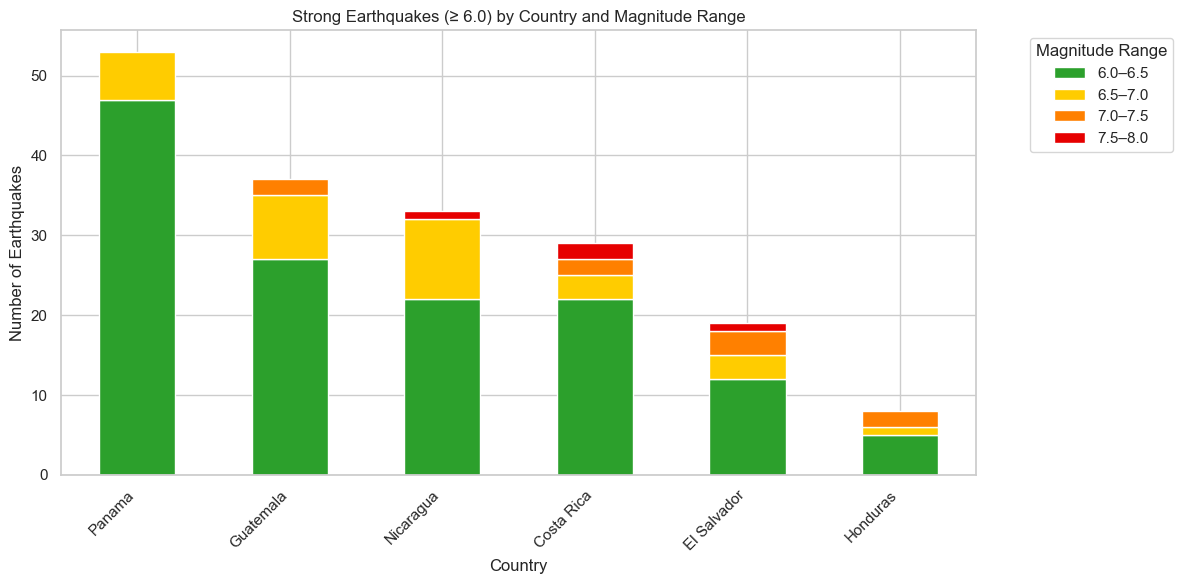

In [12]:
# Set threshold for strong earthquakes
strongEqThreshold = 6.0

# Filter for strong earthquakes
strongEq = eqSimple[eqSimple['mag'] >= strongEqThreshold].copy()

# Define magnitude bins (0.5 increments) up to the max magnitude in the dataset
maxMag = np.ceil(strongEq['mag'].max() * 2) / 2  # round up to nearest 0.5
bins = np.arange(6.0, maxMag + 0.5, 0.5)
labels = [f"{b:.1f}–{b+0.5:.1f}" for b in bins[:-1]]

# Categorize magnitudes into bins
strongEq['magRange'] = pd.cut(strongEq['mag'], bins=bins, labels=labels, include_lowest=True)

# Count number of earthquakes per country and magnitude range
grouped = strongEq.groupby(['country', 'magRange']).size().unstack(fill_value=0)

# Sort countries by total number of strong earthquakes
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Define custom color palette: green → yellow → orange → red
baseColors = ["#2ca02c", "#ffcc00", "#ff8000", "#e60000"]  # Adjust if more bins
colorCount = len(grouped.columns)
if colorCount > len(baseColors):
    # If more bins than colors, extend by repeating the last color
    colors = baseColors + [baseColors[-1]] * (colorCount - len(baseColors))
else:
    colors = baseColors[:colorCount]

# Plot the stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)

plt.title(f"Strong Earthquakes (≥ {strongEqThreshold}) by Country and Magnitude Range")
plt.xlabel("Country")
plt.ylabel("Number of Earthquakes")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Magnitude Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Strong Earthquakes (≥ 6.0) by Country and Magnitude Range

The stacked bar chart above provides a comparative view of strong earthquakes (magnitude ≥ 6.0) by country in Central America. Each bar is divided into segments representing different magnitude ranges:

- 🟩 **6.0–6.5** (green): Moderate strong earthquakes  
- 🟨 **6.5–7.0** (yellow): Noticeably strong, can cause damage  
- 🟧 **7.0–7.5** (orange): Major events, typically more destructive  
- 🟥 **≥ 7.5** (red): Severe and potentially catastrophic  

#### Observations:

- **Panama** has the highest number of strong earthquakes overall, most of them in the 6.0–6.5 range.
- **Guatemala** and **Nicaragua** follow, each showing significant activity in both 6.0–6.5 and 6.5–7.0 ranges.
- **Costa Rica** stands out with a relatively higher share of very strong quakes (≥ 7.5).
- **El Salvador** and **Honduras** show fewer total events but still include some severe ones.

This breakdown helps not only to compare countries by quantity of seismic events but also by **intensity**, providing more actionable insights for seismic risk assessment and preparedness.


## Analysis of Magnitude Distribution of Strong Earthquakes (≥ 6.0) by Country

The following boxplot visualizes the distribution of earthquake magnitudes (≥ 6.0) across different countries. Here are the key insights:

---

### 1. **Similar Median Magnitudes Across Countries**
- Most countries exhibit a median earthquake magnitude between **6.1 and 6.4**.
- **El Salvador** and **Costa Rica** show slightly higher median magnitudes, indicating that earthquakes tend to be more intense on average in these countries.

### 2. **Higher Severity Potential in Honduras and El Salvador**
- **Honduras** displays the **widest range of magnitudes**, with upper values reaching **7.5**, suggesting that it experiences some of the strongest events in the region.
- **El Salvador** also shows high variability with **extreme outliers**, highlighting a potentially higher seismic risk.

### 3. **Panama Has the Least Variability**
- Panama's box is compact, indicating **low variability** in earthquake strength.
- While it may have a high number of earthquakes (based on earlier bar plots), the **magnitudes are consistently lower**, implying less threat from extreme events.

### 4. **Costa Rica Shows Moderate Variability**
- The distribution in Costa Rica suggests a mix of moderately strong and occasionally severe events, with some outliers approaching **7.2**.

### 5. **Nicaragua and Guatemala Exhibit Similar Profiles**
- Both countries show **balanced distributions** with a few significant outliers.
- Their median magnitudes are consistent with other countries, indicating a stable pattern of seismic activity.

---

### ✅ Operational Implications
- **El Salvador and Honduras** should be considered **high-priority zones** for earthquake preparedness due to their exposure to stronger quakes.
- **Panama** may experience many quakes, but with **lower maximum intensity**.
- Countries like **Costa Rica, Guatemala, and Nicaragua** present **intermediate risk**, with the potential for both moderate and strong earthquakes.

---

> 🔽 **See the boxplot below for visual reference**


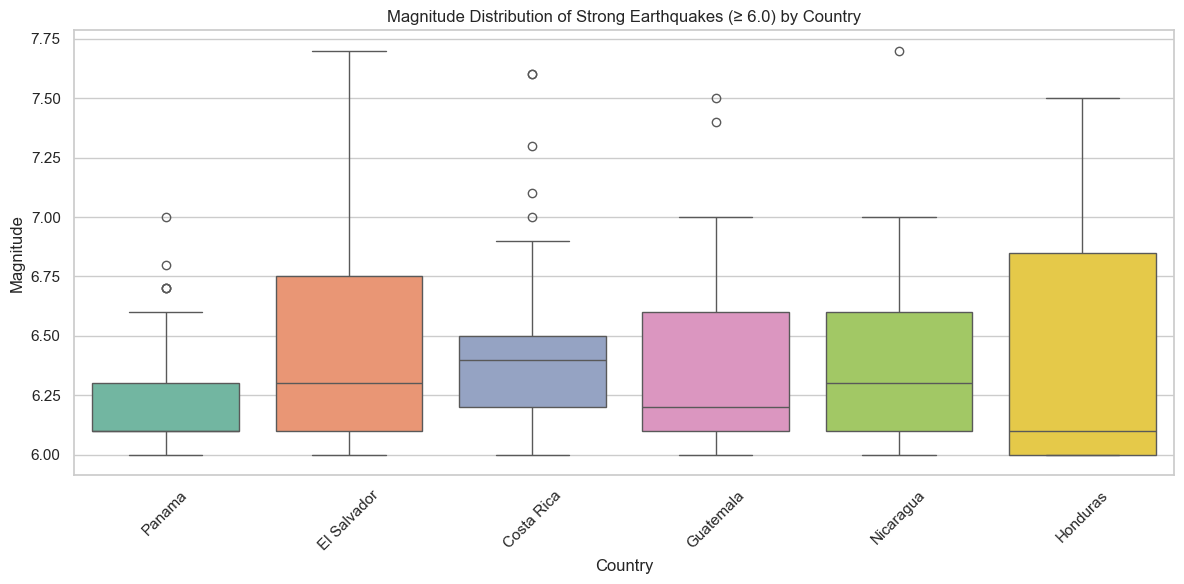

In [13]:
# Filter earthquakes with magnitude ≥ 6.0
strongEq = eqSimple[eqSimple['mag'] >= 6.0]

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(data=strongEq, x='country', y='mag', palette='Set2')

# Customize the plot
plt.title('Magnitude Distribution of Strong Earthquakes (≥ 6.0) by Country')
plt.xlabel('Country')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


## Create Interactive Maps for Visual Analysis

In this section, we will use interactive maps to visualize the geographical distribution of earthquakes in Central America. The maps will help us:

- Identify clusters of seismic activity.
- Explore patterns based on magnitude, and location.
- Gain insights through visual exploration of recent events.

We'll use the Folium library to plot earthquake data dynamically on a base map.


In [14]:
# Set magnitude threshold for filtering
magThreshold = 5.0

# Filter the data
filteredDf = df[(df['mag'] >= magThreshold) & (df['mag'].notna())].copy()

# Create heatmap points: [lat, lon, mag]
heatData = filteredDf[['latitude', 'longitude', 'mag']].values.tolist()

# Initialize the map centered on Central America
m = folium.Map(
    location=[12.5, -85.0],
    zoom_start=5.5,
    tiles='CartoDB positron',
    attr='Map tiles by CartoDB — Map data © OpenStreetMap contributors'
)

# Add CircleMarkers with tooltips
for _, row in filteredDf.iterrows():
    if pd.notnull(row['time']):
        tooltipText = f"{row['country']}<br>Mag: {row['mag']:.1f}<br>{row['time'].strftime('%Y-%m-%d %H:%M')}"
    else:
        tooltipText = f"{row['country']}<br>Mag: {row['mag']:.1f}<br>No time data"

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=(1 + row['mag'])/1,
        color='blue',
        opacity=0.0,
        fill=False,
        fill_opacity=0.1,
        tooltip=folium.Tooltip(tooltipText)
    ).add_to(m)

# Add the heatmap layer
HeatMap(heatData, radius=5, blur=5, max_zoom=10).add_to(m)

# Add title to the map
from folium import Element

titleHtml = '''
     <h3 align="center" style="font-size:20px"><b>Earthquakes in Central America, 1975 - July 2025 (Magnitude ≥ 5.0)</b></h3>
'''
m.get_root().html.add_child(Element(titleHtml))

# Save the map to an HTML file
m.save('earthquake_map.html')
print("✅ Map saved successfully as 'earthquake_map.html'")

# Display the map
m


✅ Map saved successfully as 'earthquake_map.html'


### 🌍 Interpretation of the Earthquake Heatmap (Magnitude ≥ 5.0, 1975–July 2025)

This heatmap reveals the spatial distribution and intensity of seismic activity in Central America over the last 50 years for earthquakes with magnitude ≥ 5.0.

#### 1. **Main Seismic Zone: Pacific Coast**
The highest concentration of seismic activity (red and yellow areas) is observed along the **Pacific coastline**, stretching from **Chiapas (Mexico)** to **Panama**. This aligns with the location of the **Pacific Ring of Fire**, where the **Cocos and Caribbean tectonic plates** interact.

#### 2. **High Seismic Density in Specific Areas**
Countries such as **El Salvador** and **Nicaragua** show particularly intense earthquake activity. Notable hotspots include regions near **Managua**, **León**, **San Salvador**, and the **Gulf of Fonseca**.

#### 3. **Low Activity in the Caribbean Region**
Areas in **northern Honduras**, **Belize**, and the **Caribbean coast of Panama** show minimal or no seismic activity at this magnitude level. This confirms that major seismic events in the region are mainly driven by tectonic activity along the Pacific margin.

#### 4. **Costa Rica and Panama Also Show Notable Activity**
Although less dense than El Salvador or Nicaragua, parts of **Costa Rica** and **western Panama** also exhibit considerable seismic activity, particularly near **Puntarenas**, **Golfito**, and **David**.

---

#### ✅ Practical Applications

- **Seismic risk management**: Identify highly vulnerable urban and rural zones.
- **Infrastructure design**: Apply strict earthquake-resistant standards in red zones.
- **Seismic monitoring**: Guide the placement of sensors and early-warning systems.
- **Public awareness**: Focus educational efforts on the most active regions.


### 🗺️ Top 10 Strongest Earthquakes in Central America (1975–2025)

This next interactive map displays the **ten most powerful earthquakes** recorded in Central America over the last 50 years, based on their magnitude.

Each red circular marker shows a **ranked number** from 1 to 10, where:
- **1** represents the strongest earthquake in the dataset.
- **10** represents the tenth strongest.

By hovering over a marker, you can see detailed information about each earthquake, including:
- 🌍 **Country**
- 📅 **Date of occurrence**
- 📏 **Magnitude**
- ⬇️ **Depth in kilometers**

The goal of this map is to highlight where the most intense seismic events have occurred and provide insight into their distribution across the region.


In [15]:

# Get the top 10 strongest earthquakes
top10 = df.sort_values(by='mag', ascending=False).head(10).copy()
top10['Date'] = pd.to_datetime(top10['time']).dt.strftime('%Y-%m-%d')
top10 = top10.reset_index(drop=True)  # Ensure ranking from 0 to 9

# Create the base map
mTop10 = folium.Map(location=[13.5, -85], zoom_start=5.5, tiles='CartoDB positron')

# Add numbered circle markers
for i, row in top10.iterrows():
    country = row.get('place', 'Unknown').split(',')[-1].strip()
    tooltip_text = (
        f"<b>🌍 Country:</b> {country}<br>"
        f"<b>📅 Date:</b> {row['Date']}<br>"
        f"<b>📏 Magnitude:</b> {row['mag']}<br>"
        f"<b>⬇️ Depth:</b> {row['depth']} km"
    )

    folium.Marker(
        location=[row['latitude'], row['longitude']],
        tooltip=tooltip_text,
        icon=folium.DivIcon(html=f"""
            <div style="
                font-size: 16px;
                font-weight: bold;
                color: white;
                background-color: darkred;
                border-radius: 50%;
                width: 30px;
                height: 30px;
                text-align: center;
                line-height: 30px;
                box-shadow: 1px 1px 4px rgba(0,0,0,0.5);
            ">{i+1}</div>
        """)
    ).add_to(mTop10)

# Add map title
title_html = '''
    <h3 align="center" style="font-size:20px">
        <b> Top 10 Strongest Earthquakes in Central America (1975–2025)</b>
    </h3>
'''
mTop10.get_root().html.add_child(folium.Element(title_html))

# Save and display
mTop10.save("Top10_Earthquakes.html")
mTop10


---

### 🔚 Final Note

This notebook explored five decades of earthquake activity across Central America using data visualization techniques, geospatial mapping, and interactive analysis.

Through heatmaps and ranked markers, we gained valuable insights into:
- The geographic concentration of high-magnitude seismic events,
- Temporal and spatial patterns of seismic activity,
- Key regions of risk such as El Salvador, Nicaragua, and southern Mexico.

While this project is not intended as a scientific or predictive tool, it provides a compelling view of earthquake history in the region. It may serve as a starting point for further exploration or awareness initiatives.

> ⚠️ **Disclaimer**  
> I am not a seismologist or earthquake expert. This analysis is for informational and educational purposes only, based on publicly available data. It should not be used for emergency planning, risk assessment, or scientific conclusions.

Thank you for exploring this journey through seismic data with me.
